In [1]:
import pandas as pd
import numpy as np
titanic = pd.read_csv('titanic.csv' , low_memory=False)

In [2]:
titanic[titanic['Embarked'] == 'S']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [3]:
titanic = titanic[titanic['Embarked'].notna()]
titanic = titanic[titanic['Pclass'].notna()]
titanic = titanic[titanic['Sex'].notna()]
titanic = titanic[titanic['SibSp'].notna()]
titanic = titanic[titanic['Parch'].notna()]
titanic = titanic[titanic['Age'].notna()]
gender = {'male': 1,'female': 2}
titanic.Sex = [gender[item] for item in titanic.Sex]
titanic = titanic[titanic['Embarked'].notna()]
Embark = {'S' : 1 , 'C' : 2 , 'Q' : 3}
titanic.Embarked = [Embark[item] for item in titanic.Embarked]

In [4]:
titanic_select = titanic[[ "Pclass", "Sex", "Age", "SibSp", "Parch", "Embarked"]].copy()
survived = titanic[["Survived"]]

In [5]:
x_train = titanic_select[:530]
y_train = survived[:530]
x_test = titanic_select[530:]
y_test = survived[530:]

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn import preprocessing
from sklearn.metrics import classification_report
svm_clf = Pipeline([
("scaler", StandardScaler()),
("linear_svc", LinearSVC(C=1, loss="hinge")),])
svm_clf.fit(x_train, y_train)
scalar_train= preprocessing.StandardScaler().fit(x_train)
scalar_test= preprocessing.StandardScaler().fit(x_test)
x_train_scale = scalar_train.transform(x_train)
x_test_scale = scalar_test.transform(x_test)
svm_clf.fit(x_train_scale, y_train)
prediction = svm_clf.predict(x_test_scale)
print(classification_report(prediction , y_test))

              precision    recall  f1-score   support

           0       0.87      0.80      0.84       121
           1       0.66      0.77      0.71        61

    accuracy                           0.79       182
   macro avg       0.77      0.79      0.77       182
weighted avg       0.80      0.79      0.79       182



/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [14]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(x_train, y_train)
prediction_dt = tree_clf.predict(x_test)
print(classification_report(prediction_dt , y_test))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86       131
           1       0.62      0.86      0.72        51

    accuracy                           0.81       182
   macro avg       0.78      0.83      0.79       182
weighted avg       0.85      0.81      0.82       182



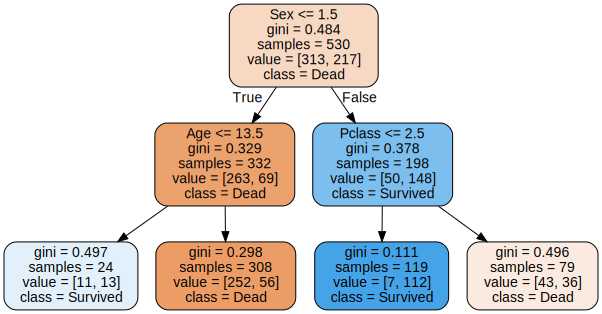

In [15]:
from sklearn.tree import export_graphviz
from graphviz import Source

target_name = ["Dead" , "Survived"]
feature_names = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Embarked"]
export_graphviz(
tree_clf,
out_file="graph.dot",  
feature_names=feature_names,
class_names=target_name,
rounded=True,
filled=True
)
Source.from_file("graph.dot")

In [152]:
import tensorflow as tf
from tensorflow import keras
model = keras.models.Sequential([
keras.layers.InputLayer(input_shape = 6),
keras.layers.Dense(18, activation="relu"),
keras.layers.Dense(10, activation="relu"),
keras.layers.Dense(2, activation="sigmoid")])
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])
history = model.fit(x_train_scale , y_train , epochs=20 )
predict_mlp = model.predict_classes(x_test_scale)
print(classification_report(predict_mlp , y_test))

Epoch 1/20
17/17 [==============================] - 0s 929us/step - loss: 0.7892 - accuracy: 0.5000
Epoch 2/20
17/17 [==============================] - 0s 918us/step - loss: 0.7565 - accuracy: 0.5415
Epoch 3/20
17/17 [==============================] - 0s 1ms/step - loss: 0.7298 - accuracy: 0.5604
Epoch 4/20
17/17 [==============================] - 0s 945us/step - loss: 0.7070 - accuracy: 0.5887
Epoch 5/20
17/17 [==============================] - 0s 1ms/step - loss: 0.6861 - accuracy: 0.6057
Epoch 6/20
17/17 [==============================] - 0s 929us/step - loss: 0.6674 - accuracy: 0.6434
Epoch 7/20
17/17 [==============================] - 0s 963us/step - loss: 0.6500 - accuracy: 0.6774
Epoch 8/20
17/17 [==============================] - 0s 961us/step - loss: 0.6342 - accuracy: 0.6849
Epoch 9/20
17/17 [==============================] - 0s 905us/step - loss: 0.6198 - accuracy: 0.7019
Epoch 10/20
17/17 [==============================] - 0s 941us/step - loss: 0.6057 - accuracy: 0.7245
Epo

/home/amir/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


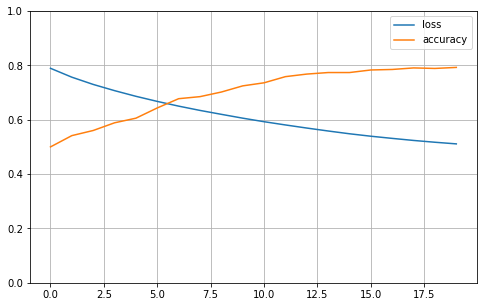

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [142]:
predict_mlp = model.evaluate(x_test_scale , y_test)

6/6 [==============================] - 0s 910us/step - loss: 0.4389 - accuracy: 0.8407


/home/amir/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [144]:
predict_mlp

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0])

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       120
           1       0.73      0.84      0.78        62

    accuracy                           0.84       182
   macro avg       0.82      0.84      0.83       182
weighted avg       0.85      0.84      0.84       182

